In [1]:
import os
os.chdir('..')

In [2]:
import pandas as pd
import numpy as np
import datajoint as dj
dj.config['database.host'] = '10.86.1.219'
dj.config['database.user'] = 'root'
dj.config['database.password'] = 'retina'
dj.config["enable_python_native_blobs"] = True # Only for testing in dj0.12 (https://github.com/datajoint/datajoint-python#python-native-blobs)

%env DJ_SUPPORT_FILEPATH_MANAGEMENT=TRUE

import main
drive_path = r"W:\VEIDB/"
data_path = r"Z:\Data"
# data_path =r"V:\Data/"
# data_path =r"W:\Data/"

ft = main.load(drive_path, data_path)

import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('dark')

env: DJ_SUPPORT_FILEPATH_MANAGEMENT=TRUE
Connecting root@10.86.1.219:3306


In [183]:
from ephys import neuropixels_utils
from pathlib import Path
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
# lfp_path = r'Z:\Data\01232\neuropixel\20200328a\spikeGLX\0002_EXPA_g0_t0.imec.lf.bin'
# lfp_path = r'Y:\Data\01247\M01\20200328e\spikeGLX\0002_EXPA_g0_t0.imec.lf.bin'
lfp_path = r'Y:\Data\01261\neuropixel\20200327f\spikeGLX\0002_EXPA_g0_t0.imec.lf.bin'

In [184]:
exp_table = ft.Experiment()
sess_table = ft.Session()
mouse_table = ft.Mouse()
subsess_table = ft.Subsession()
raw_table = ft.ephys_tables.EphysRaw()
subsess_events_table = ft.event_tables.SubsessionEvents()
subsess_spikes_table = ft.ephys_tables.SubsessionSpikes()
trial_events_table = ft.event_tables.TrialEvents()

In [185]:
subsess_events_table & {'experiment_id': '01261'}

experiment_id,mouse_id,session_id,subsession_id,subsession_type,start_abs,trials,subsession_triggers,trials_stimtypes,trials_starts,trials_ends
01261,M01,20200327f,CHPE_0009,CHPE,67957524,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
01261,M01,20200327f,DIMM_0004,DIMM,34596216,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
01261,M01,20200327f,EXPA_0002,EXPA,18360984,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
01261,M01,20200327f,EXPB_0014,EXPB,89845620,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
01261,M01,20200327f,EXPK_0010,EXPK,77925732,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
01261,M01,20200327f,EXPN_0007,EXPN,61560216,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
01261,M01,20200327f,EXPW_0005,EXPW,36061512,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
01261,M01,20200327f,OPTS_0001,OPTS,0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=


In [186]:
from ephys import readSGLX
readSGLX.readMeta(Path(lfp_path)) # Sample rate for lfp is 2500

{'acqApLfSy': '384,384,1',
 'appVersion': '20180515',
 'fileCreateTime': '2020-03-27T19:35:23',
 'fileName': 'D:/20200327f/spikeGLX/0002_EXPA_g0_t0.imec.lf.bin',
 'fileSHA1': 'BF0F82F46B9095629C4942BB7DCC2F776FAD0461',
 'fileSizeBytes': '94881710',
 'fileTimeSecs': '49.2892',
 'firstSample': '6321640',
 'gateMode': 'Immediate',
 'imAiRangeMax': '0.6',
 'imAiRangeMin': '-0.6',
 'imDoGainCor': 'true',
 'imHpFlt': '300',
 'imNoLEDs': 'true',
 'imProbeOpt': '3',
 'imProbeSN': '641251425',
 'imRoFile': 'C:/SpikeGLX/Release_v20180515-phase3A/SpikeGLX/tst0.imro',
 'imSampRate': '2500',
 'imSoftStart': 'true',
 'imStdby': '',
 'imVersAPI': '4.3',
 'imVersBs': '0.3',
 'imVersHwr': '4.2',
 'nSavedChans': '385',
 'snsApLfSy': '0,384,1',
 'snsSaveChanSubset': '384:768',
 'syncImChan': '0',
 'syncImChanType': '0',
 'syncImThresh': '3',
 'syncSourceIdx': '0',
 'syncSourcePeriod': '1',
 'trgTTLAIChan': '12',
 'trgTTLBit': '0',
 'trgTTLInarow': '5',
 'trgTTLIsAnalog': 'false',
 'trgTTLIsNInf': 'true',

In [187]:
lfps = neuropixels_utils.extract_analog(Path(lfp_path), channels=range(384))

nChan: 385, nFileSamp: 123223


In [188]:
subsess_events_table & {'experiment_id': '01261'}

experiment_id,mouse_id,session_id,subsession_id,subsession_type,start_abs,trials,subsession_triggers,trials_stimtypes,trials_starts,trials_ends
01261,M01,20200327f,CHPE_0009,CHPE,67957524,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
01261,M01,20200327f,DIMM_0004,DIMM,34596216,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
01261,M01,20200327f,EXPA_0002,EXPA,18360984,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
01261,M01,20200327f,EXPB_0014,EXPB,89845620,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
01261,M01,20200327f,EXPK_0010,EXPK,77925732,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
01261,M01,20200327f,EXPN_0007,EXPN,61560216,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
01261,M01,20200327f,EXPW_0005,EXPW,36061512,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=
01261,M01,20200327f,OPTS_0001,OPTS,0,=BLOB=,=BLOB=,=BLOB=,=BLOB=,=BLOB=


In [189]:
subsess_key = {'experiment_id': '01261', 'session_id': '20200327f', 'subsession_id': 'EXPA_0002'}
# subsess_key = {'experiment_id': '01232', 'session_id': '20200328a', 'subsession_id': 'EXPA_0002'}

trials_starts, trials_ends = (subsess_events_table & subsess_key).fetch1('trials_starts', 'trials_ends')

In [190]:
trials_starts*2500/30000

array([ 5327.33333333, 14952.25      , 24577.08333333, 34202.        ,
       43827.        , 53451.91666667, 63076.83333333, 72701.91666667,
       82326.75      , 91951.75      ])

In [191]:
trials_ends - trials_starts

array([24999, 24999, 25001, 25001, 25000, 25001, 25001, 25000, 25000,
       25004], dtype=int64)

In [192]:
lfps.shape

(384, 123223)

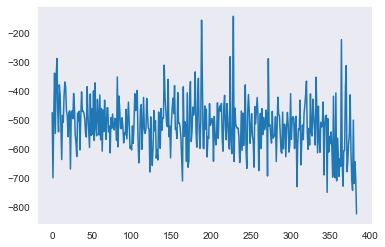

In [193]:
plt.plot(np.mean(lfps, axis=1))

In [194]:
# Map channels to depth
channel_map = np.load(r'Z:\Data\01231\neuropixel\20200327a\sorted\001\channel_map.npy')
channel_positions = np.load(r'Z:\Data\01231\neuropixel\20200327a\sorted\001\channel_positions.npy')

In [195]:
channel_map

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [196]:
channel_depths = channel_positions[:,1]
channel_positions # 2 channels per depth

array([[  43.,   20.],
       [  11.,   20.],
       [  59.,   40.],
       [  27.,   40.],
       [  43.,   60.],
       [  11.,   60.],
       [  59.,   80.],
       [  27.,   80.],
       [  43.,  100.],
       [  11.,  100.],
       [  59.,  120.],
       [  27.,  120.],
       [  43.,  140.],
       [  11.,  140.],
       [  59.,  160.],
       [  27.,  160.],
       [  43.,  180.],
       [  11.,  180.],
       [  59.,  200.],
       [  27.,  200.],
       [  43.,  220.],
       [  11.,  220.],
       [  59.,  240.],
       [  27.,  240.],
       [  43.,  260.],
       [  11.,  260.],
       [  59.,  280.],
       [  27.,  280.],
       [  43.,  300.],
       [  11.,  300.],
       [  59.,  320.],
       [  27.,  320.],
       [  43.,  340.],
       [  11.,  340.],
       [  59.,  360.],
       [  27.,  360.],
       [  11.,  380.],
       [  59.,  400.],
       [  27.,  400.],
       [  43.,  420.],
       [  11.,  420.],
       [  59.,  440.],
       [  27.,  440.],
       [  4

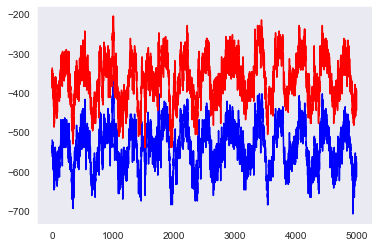

In [197]:
plt.plot(lfps[4,:5000], 'b')
plt.plot(lfps[5,:5000], 'r')
plt.show()

In [198]:
from scipy import ndimage


In [199]:
idx = 53453

In [200]:
channel_depths

array([  20.,   20.,   40.,   40.,   60.,   60.,   80.,   80.,  100.,
        100.,  120.,  120.,  140.,  140.,  160.,  160.,  180.,  180.,
        200.,  200.,  220.,  220.,  240.,  240.,  260.,  260.,  280.,
        280.,  300.,  300.,  320.,  320.,  340.,  340.,  360.,  360.,
        380.,  400.,  400.,  420.,  420.,  440.,  440.,  460.,  460.,
        480.,  480.,  500.,  500.,  520.,  520.,  540.,  540.,  560.,
        560.,  580.,  580.,  600.,  600.,  620.,  620.,  640.,  640.,
        660.,  660.,  680.,  680.,  700.,  700.,  720.,  720.,  740.,
        740.,  760.,  780.,  780.,  800.,  800.,  820.,  820.,  840.,
        840.,  860.,  860.,  880.,  880.,  900.,  900.,  920.,  920.,
        940.,  940.,  960.,  960.,  980.,  980., 1000., 1000., 1020.,
       1020., 1040., 1040., 1060., 1060., 1080., 1080., 1100., 1100.,
       1120., 1120., 1140., 1160., 1160., 1180., 1180., 1200., 1200.,
       1220., 1220., 1240., 1240., 1260., 1260., 1280., 1280., 1300.,
       1300., 1320.,

In [201]:
from scipy.signal import butter, lfilter, freqz


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 2500       # sample rate, Hz
cutoff = 300  # desired cutoff frequency of the filter, Hz

(3, 192, 1250)
(192, 1250)
(43, 937)
[ 0.  0.  0.  0.  0.  0. -2.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.
  0.  0.  0.  0.  0.  0.  0. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.
  0.  0.  0.  0.  0. -2.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0. -2.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  0.  0.  0.  0.  0.  0.  0.  0. -2.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
(array([  0,   7,  16,  26,  36,  42,  48,  64,  73,  83, 102, 117, 130],
      dtype=int64),)
[ 43  50  59  69  79  85  91 107 116 126 145 160 173]
[ 920 1060 1240 1440 1640 1760 1880 2200 2380 2580 2960 3260 3520]


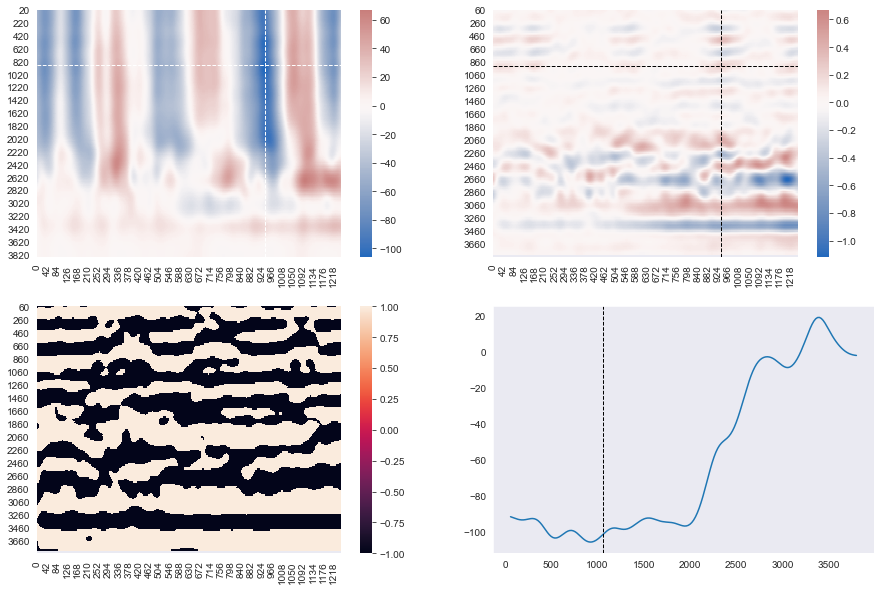

In [202]:
def get_mean_CSD(lfps, idxs, depths):
    fig, axs = plt.subplots(2, 2, figsize=(15,10))
    channels_by_depth = np.mean(np.reshape(lfps, (lfps.shape[0]//2, 2, lfps.shape[1])), axis=1)
    depths = depths[::2]
#     channels_by_depth = lfps[::2]
    channels_by_depth = butter_lowpass_filter(channels_by_depth, cutoff, fs, order)

    channels_by_depth = ndimage.gaussian_filter1d(channels_by_depth, 15, axis=1)
    channels_by_depth = ndimage.gaussian_filter1d(channels_by_depth, 5, axis=0)
    
    signals_matrix = []
    for idx in idxs:
        # Take signal around idx and average
        baseline = np.mean(channels_by_depth[:,int(idx-2.5*100):int(idx+2.5*0)], axis=1)
        signals_matrix.append(channels_by_depth[:,int(idx-2.5*0):int(idx+2.5*500)]-np.expand_dims(baseline,1))
#         signals_matrix.append(channels_by_depth[:,int(idx-2.5*0):int(idx+2.5*500)])

    signals_matrix = np.stack(signals_matrix)
    print(signals_matrix.shape)
    signals_mean = np.mean(signals_matrix, axis=0)
    print(signals_mean.shape)
    
    CSD = (signals_mean[4:]+signals_mean[:-4] - 2*signals_mean[2:-2])/4
    CSD_depths = depths[2:-2]
    # CSD = np.diff(np.diff(channels_by_depth, axis=0), axis=0)
    
    min_idx = np.unravel_index(signals_mean[2:-2].argmin(), signals_mean[2:-2].shape)
    print(min_idx)
    
    signals_single = signals_mean[:,min_idx[1]]
    CSD_single = CSD[:,min_idx[1]]
    
    print(np.diff(np.sign(CSD_single[min_idx[0]:])))
    print(np.where(np.diff(np.sign(CSD_single[min_idx[0]:]), prepend=0)!=0))
    CSD_zero = min_idx[0] + np.where(np.diff(np.sign(CSD_single[min_idx[0]:]), prepend=0)!=0)[0] # Check correctness prepend
    print(CSD_zero)
    
    sb.heatmap(signals_mean, ax=axs[0,0], yticklabels=depths[::10], cmap='vlag', center=0)
    axs[0,0].axvline(min_idx[1], c='white', linewidth=1, linestyle='--')
    axs[0,0].axhline(min_idx[0], c='white', linewidth=1, linestyle='--')
    axs[0,0].set_yticks(np.arange(0, len(depths), 10))
    sb.heatmap(CSD, ax=axs[0,1], yticklabels=CSD_depths[::10], cmap='vlag', center=0)
    axs[0,1].axvline(min_idx[1], c='k', linewidth=1, linestyle='--')
    axs[0,1].axhline(min_idx[0], c='k', linewidth=1, linestyle='--')
    axs[0,1].set_yticks(np.arange(0, len(depths), 10))
    sb.heatmap(np.sign(CSD), ax=axs[1,0], yticklabels=CSD_depths[::10])
    axs[1,0].set_yticks(np.arange(0, len(depths), 10))
    axs[1,1].plot(CSD_depths, signals_single[2:-2])
    axs[1,1].axvline(CSD_depths[CSD_zero[1]], c='k', linewidth=1, linestyle='--')
    print(CSD_depths[CSD_zero])
#     plt.savefig('CSD_01230_EXPA.png', dpi=120)
    plt.show()
    
correct_channel_depths = np.repeat(np.arange(20, 3850, 20), 2)
get_mean_CSD(lfps, trials_starts[:3]*2500/30000, correct_channel_depths)

In [203]:
""" Freq analysis across depth """
from scipy.signal import spectrogram
lfps.shape

(384, 123223)

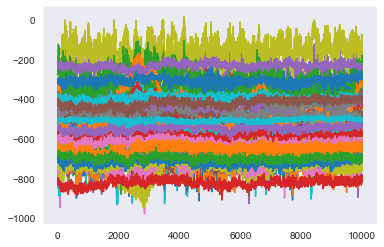

In [204]:
plt.plot(lfps[:,:10000].T)
plt.show()

In [226]:
from sklearn import decomposition, preprocessing
lfps_lowpass = butter_lowpass_filter(lfps, cutoff, fs, order)

lfps_standardized = preprocessing.StandardScaler().fit_transform(lfps_lowpass.T).T
pca = decomposition.PCA(n_components=15)
lfps_pca = pca.fit_transform(lfps_standardized)


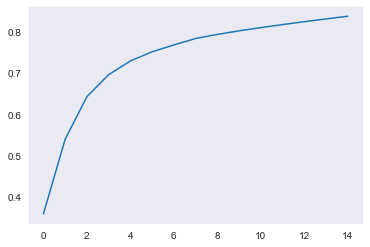

In [227]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [228]:
from sklearn import cluster
from sklearn import mixture
from scipy.signal import medfilt
# import hdbscan
cluster_labels = mixture.GaussianMixture(n_components=6).fit_predict(lfps_pca)
# cluster_labels = cluster.KMeans(n_clusters=6).fit_predict(lfps_pca)
# cluster_labels = clusterer.fit_predict(lfps_pca)
cluster_labels = medfilt(cluster_labels, kernel_size=5)
# clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
# cluster.KMeans()

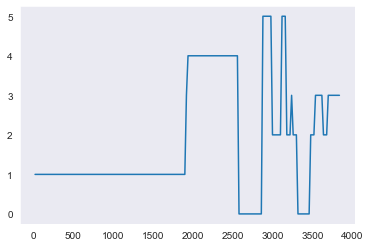

In [229]:
correct_channel_depths = np.repeat(np.arange(20, 3850, 20), 2)

plt.plot(correct_channel_depths[::2], cluster_labels[::2])

In [230]:
transitions = np.where(np.diff(cluster_labels) != 0)[0]

In [231]:
correct_channel_depths[transitions]

array([1900, 1920, 2560, 2860, 2980, 3000, 3000, 3020, 3020, 3040, 3040,
       3100, 3160, 3180, 3180, 3200, 3200, 3220, 3240, 3300, 3460, 3520,
       3620, 3680])

In [175]:
correct_channel_depths.shape
cluster_labels.shape

(384,)

In [600]:
periodograms = []
for lfp in lfps[::2]:
    
    freqs, times, spect = spectrogram(lfp[:100000], fs=2500, mode='psd')
#     spect_normed = spect / np.max(spect, axis=0)
#     plt.pcolormesh(times, freqs, spect_normed, shading='gouraud')
#     plt.ylim(0, 300)
#     plt.show()
    periodograms.append(np.mean(spect, axis=1))
#     plt.plot(np.mean(spect, axis=1))
#     plt.show()

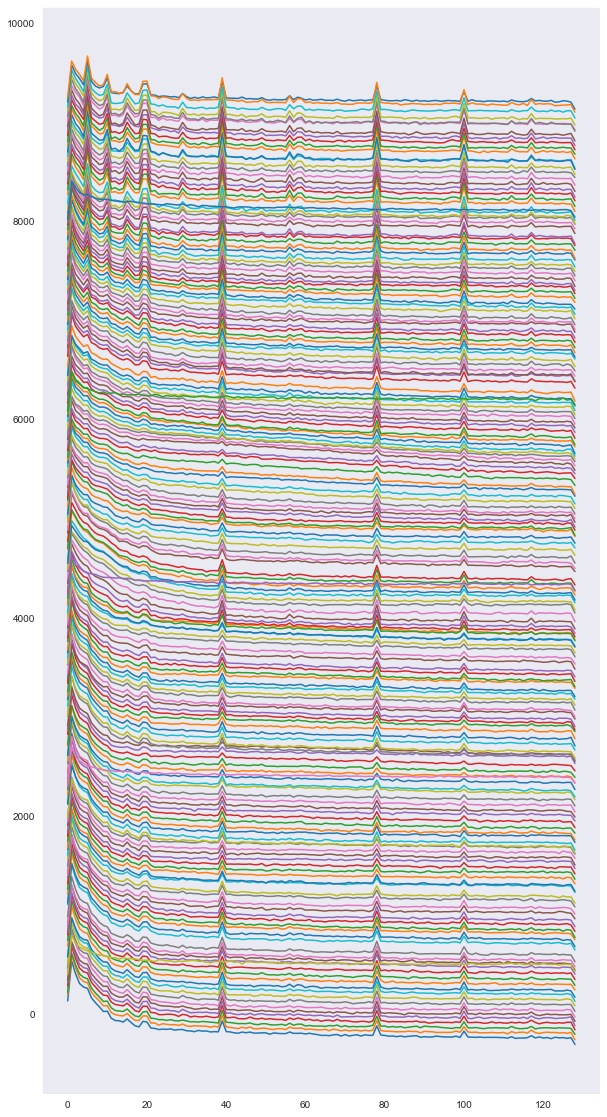

In [628]:
fig, ax = plt.subplots(1, 1, figsize=(10, 20))
for i, period in enumerate(periodograms):
    ax.plot(np.log(period[:200])*100+i*50)

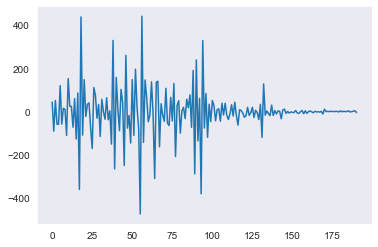

In [606]:
plt.plot(np.sum(np.diff(np.stack(periodograms), axis=0), axis=1))

In [573]:
freqs.shape

(129,)

In [574]:
spect.shape

(129, 223)

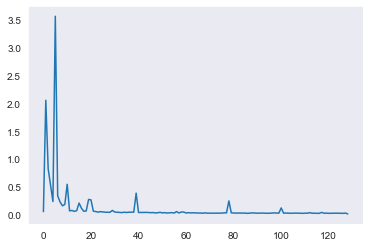

In [575]:
plt.plot(np.mean(spect, axis=1))

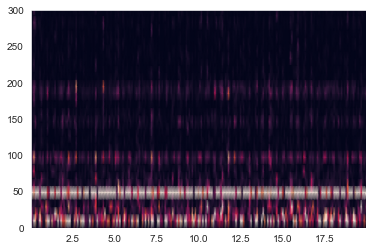

In [568]:
freqs, times, spect = spectrogram(lfps[370,:50000], fs=2500, mode='psd')
spect_normed = spect / np.max(spect, axis=0)
plt.pcolormesh(times, freqs, spect_normed, shading='gouraud')
plt.ylim(0, 300)
plt.show()

In [324]:
lfps.shape

(384, 124463)

In [330]:
channel_depths/1

array([  20.,   20.,   40.,   40.,   60.,   60.,   80.,   80.,  100.,
        100.,  120.,  120.,  140.,  140.,  160.,  160.,  180.,  180.,
        200.,  200.,  220.,  220.,  240.,  240.,  260.,  260.,  280.,
        280.,  300.,  300.,  320.,  320.,  340.,  340.,  360.,  360.,
        380.,  400.,  400.,  420.,  420.,  440.,  440.,  460.,  460.,
        480.,  480.,  500.,  500.,  520.,  520.,  540.,  540.,  560.,
        560.,  580.,  580.,  600.,  600.,  620.,  620.,  640.,  640.,
        660.,  660.,  680.,  680.,  700.,  700.,  720.,  720.,  740.,
        740.,  760.,  780.,  780.,  800.,  800.,  820.,  820.,  840.,
        840.,  860.,  860.,  880.,  880.,  900.,  900.,  920.,  920.,
        940.,  940.,  960.,  960.,  980.,  980., 1000., 1000., 1020.,
       1020., 1040., 1040., 1060., 1060., 1080., 1080., 1100., 1100.,
       1120., 1120., 1140., 1160., 1160., 1180., 1180., 1200., 1200.,
       1220., 1220., 1240., 1240., 1260., 1260., 1280., 1280., 1300.,
       1300., 1320.,

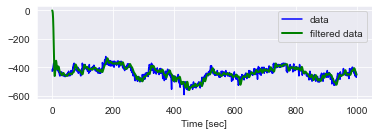

In [278]:
# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(lfps[0:5], cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(lfps[0:1,:1000].T, 'b-', label='data')
plt.plot(y[0:1, :1000].T, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

In [198]:
channels_by_depth = np.mean(np.reshape(lfps, (lfps.shape[0]//2, 2, lfps.shape[1])), axis=1)
# channels_by_depth = lfps[::2]

channels_by_depth = ndimage.gaussian_filter1d(channels_by_depth, 100, axis=1)
channels_by_depth = ndimage.gaussian_filter1d(channels_by_depth, 15, axis=0)

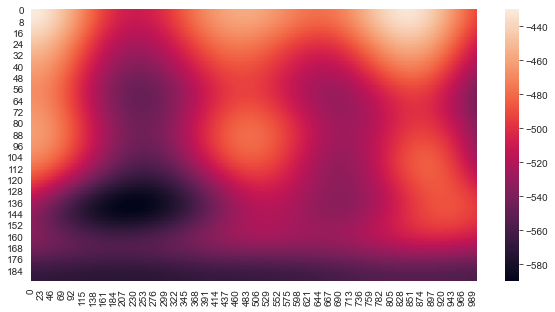

In [199]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sb.heatmap(channels_by_depth[:, ::1][:,int(14953-2.5*200):int(14953+2.5*200)], ax=ax)
plt.show()

In [200]:
CSD = (channels_by_depth[4:]+channels_by_depth[:-4] - 2*channels_by_depth[2:-2])/4
# CSD = np.diff(np.diff(channels_by_depth, axis=0), axis=0)

In [201]:
channels_by_depth.shape

(192, 124463)

In [202]:
CSD.shape

(188, 124463)

In [203]:
np.any(CSD>0)

True

In [204]:
# Find inflection points:
np.sign(CSD[:, ::1][:,int(14953-2.5*50):int(14953+2.5*50)])

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

In [205]:
np.sign(np.array([-10, -1, 1, 1, 3]))

array([-1, -1,  1,  1,  1])

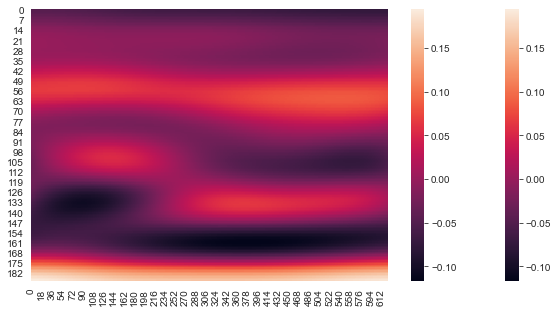

In [221]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# sb.heatmap(CSD[:, ::1][:,int(14953-2.5*50):int(14953+2.5*50)], ax=ax)
sb.heatmap(CSD[:, ::1][:,int(idx-2.5*50):int(idx+2.5*200)], ax=ax)
sb.heatmap(CSD[:, ::1][:,int(idx-2.5*50):int(idx+2.5*200)], ax=ax)

plt.show()

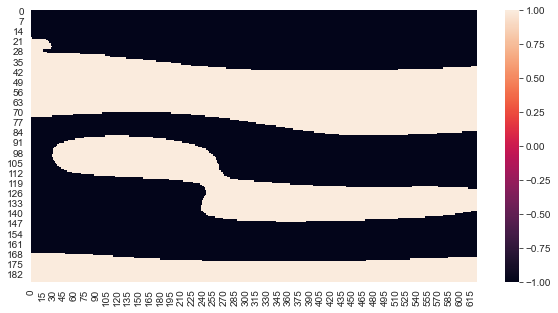

In [222]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# sb.heatmap(CSD[:, ::1][:,63941-30*50:63941+30*50], ax=ax)
sb.heatmap(np.sign(CSD[:, ::1][:,int(idx-2.5*50):int(idx+2.5*200)]), ax=ax)
plt.show()

In [215]:
""" Check that channels_by_depth is correct"""

print(np.all((lfps[0]+lfps[1])/2 == channels_by_depth[0]))

a = np.array([[1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6], [2, 3, 4, 5, 6, 7], [2, 3, 4, 5, 6, 7]])
print(a.shape)
np.mean(np.reshape(a, (a.shape[0]//2, 2, a.shape[1])), axis=1)



False
(4, 6)


array([[1., 2., 3., 4., 5., 6.],
       [2., 3., 4., 5., 6., 7.]])